# HW2: Single-View Geometry

### Imports

In [4]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np
import warnings; warnings.simplefilter('ignore')
import matplotlib.lines as mlines

from PIL import Image

## Problem 1: line-line intersection

### 1.1 Proof

### 1.2 Proof

### 1.3

In this section we will build up some tools we will use later. 

In [5]:
# Provided plotting functions

def draw_line(x,y,xlims=[0, 15],c='b--'):
    xrange = np.arange(xlims[0],xlims[1],0.1)
    A = np.vstack([x, np.ones(len(x))]).T
    k, b = np.linalg.lstsq(A, y)[0]
    plt.plot(xrange, k*xrange + b, c)
    
def newline(p1, p2):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    ax.add_line(l)
    return l

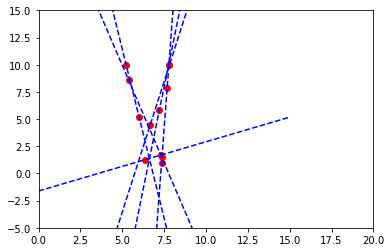

In [6]:
n = 6
P0 = np.stack((np.array([5, 5]) + 3*np.random.random(size=2) for i in range(n)))
a = np.linspace(0, 2*np.pi,n) + np.random.random(size=n)*np.pi/5.0
P1 = np.array([5 + 5*np.sin(a),5 + 5*np.cos(a)]).T

x = np.stack((P0[:,0], P0[:,1]))
y = np.stack((P1[:,0], P1[:,1]))

plt.xlim([0,20])
plt.ylim([-5,15])
plt.plot(x, y, 'ro')

for i in range(n):
    draw_line(P0[i,:], P1[i,:])


Let $A = I - nn^T$
$$
\frac{\partial D}{\partial p} = -(A + A^T) (a - p) \\
\sum_{i=1}^n (I - n_i n_i^T + (I - n_i n_i^T)^T) p = \sum_{i=1}^n (I - n_i n_i^T + (I - n_i n_i^T)^T) a_i
$$

In [45]:
# using only numpy
A = np.zeros((2, 2))
b = 0
for i in range(n):
    point0 = np.vstack([x[0, i], y[0, i]])
    point1 = np.vstack([x[1, i], y[1, i]])
    vec_n = point0 - point1
    vec_n /= np.linalg.norm(vec_n) # normalize
    vec_a = point0
    mat = np.eye(2) - vec_n @ vec_n.T
    coef = mat + mat.T # A + A.T
    A += coef
    b += coef @ vec_a

In [46]:
p_optim = np.linalg.lstsq(A, b)[0]
p_optim

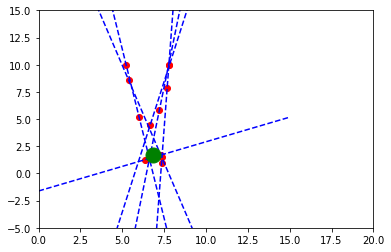

In [51]:
plt.xlim([0,20])
plt.ylim([-5,15])
plt.plot(x, y, 'ro')

for i in range(n):
    draw_line(P0[i,:], P1[i,:])
    
# draw p_optim
plt.plot(p_optim[0], p_optim[1], 'go', markersize=15)

# Problem 2: Vanishing Point Estimation

In [52]:
im = np.asarray(Image.open('data/stadium.png'))
plt.figure(figsize=(20, 40))

<Figure size 1440x2880 with 0 Axes>

<Figure size 1440x2880 with 0 Axes>

Use the provided pixel locations to solve for the vanishing points, then solve for the horizon line from the vanishing points.

In [ ]:
# Load in points from points.txt


points = np.genfromtxt("data/points.txt", delimiter=',')

points_dict = []
with open('data/points_dict.txt','r') as inf:
    for line in inf:
        points_dict.append(eval(line))  
        
points_dict = points_dict[0]

# Problem 3: Homography

## Problem 3a: Looking at the rectangle 

In [5]:
# Load the 4 corners in pixels and plot the points and use cv2.polylines to draw the polygon

im = np.asarray(Image.open('data/stadium.png'))

corners = []
with open('data/corners.txt','r') as inf:
    for line in inf:
        corners.append(eval(line))  
        

## Problem 3b: Rectification 

NameError: name 'rectified_image' is not defined

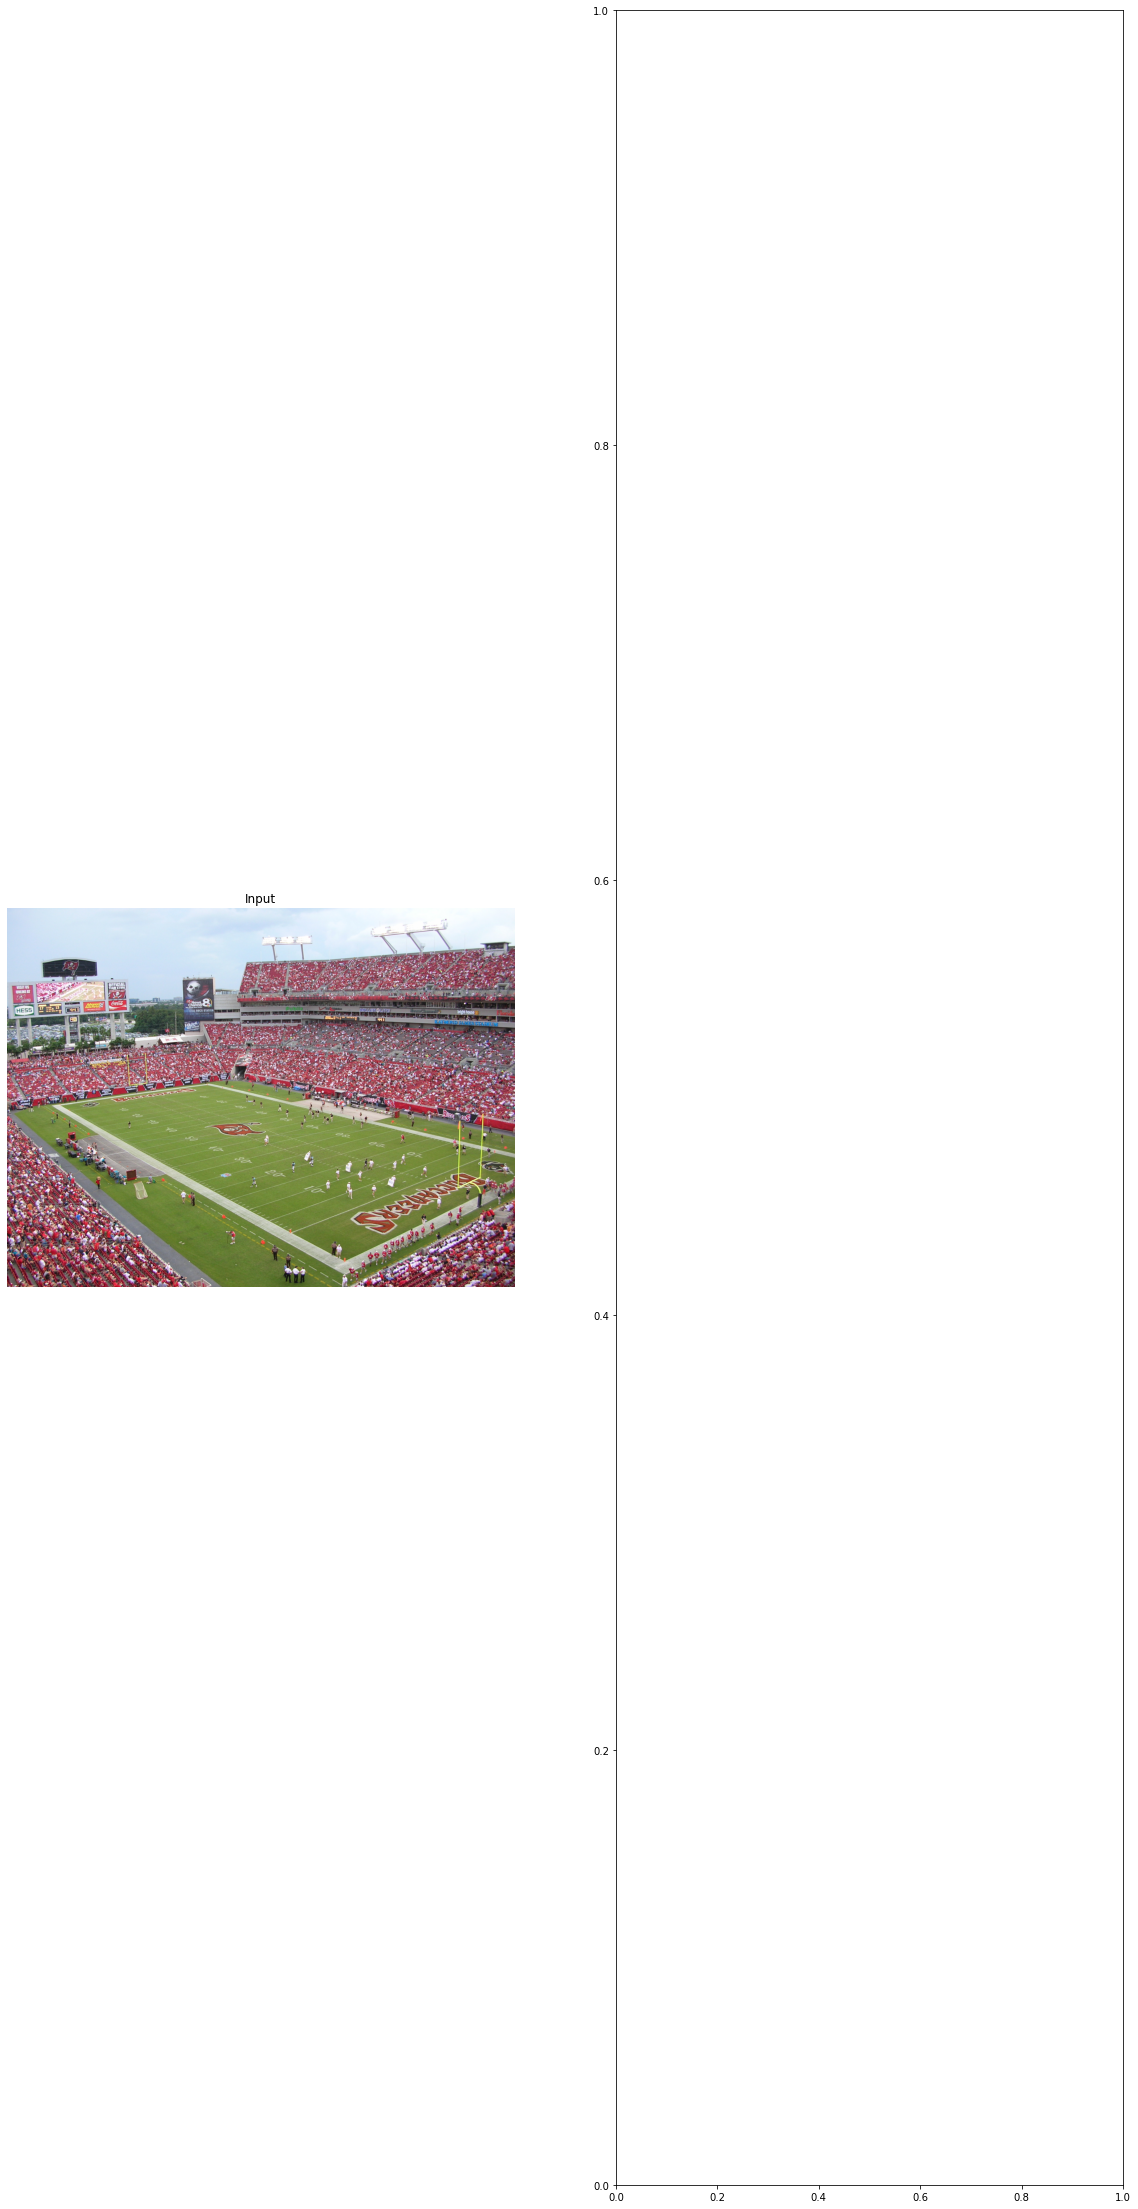

In [6]:
# Find the homography and rectify the rectangle

plt.figure(figsize=(20, 40))

plt.axis('off')
plt.subplot(121),plt.imshow(im),plt.title('Input')
plt.axis('off')
plt.subplot(122),plt.imshow(rectified_image),plt.title('Output')
plt.axis('off')
plt.show()

## Problem 3c: Measuring distances 

In [ ]:
plt.figure(figsize=(20, 40))
plt.imshow(im)

players = []
with open('data/players.txt','r') as inf:
    for line in inf:
        players.append(eval(line))  

players = players[0]

# Plot a few locations on the field, these are points of interest for the next problem
ref1_loc = players['ref1_loc']
ref2_loc = players['ref2_loc']
player_loc = players['player_loc']


In [ ]:

print("The distance between the player and ref1 is: {} yards.".format(result))

# Problem 4

In [ ]:
# interstage measurement from https://spaceflight101.com/spacerockets/falcon-9-ft/
from imageio import imread
plt.figure(figsize=(20, 40))

image = imread('composites.jpg')
plt.imshow(image)

points_dict = []
with open('data/spacex_factory.txt','r') as inf:
    for line in inf:
        points_dict.append(eval(line))  
        
points_dict = points_dict[0]


In [ ]:
from imageio import imread
plt.figure(figsize=(20, 40))

image = imread('composites.jpg')
plt.imshow(image)

# New stuff for this problem
metrology_points = []
with open('data/rocket_metrology.txt','r') as inf:
    for line in inf:
        metrology_points.append(eval(line))  
        
metrology_points = metrology_points[0]

reference_point = metrology_points['reference_point']
top_interstage = metrology_points['top_interstage']
top_nosecone = metrology_points['top_nosecone']
bottom_nosecone = metrology_points['bottom_nosecone']
bottom_interstage = metrology_points['bottom_interstage']


In [ ]:
def cross_ratio(t, b, r, v_z):
    pass

print("The estimated height of the nosecone is: {} meters.".format(H))